# Partie 3

In [1]:
# -*- coding: utf-8 -*-

from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import warnings
import pandas as pd 
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from imblearn.over_sampling import SMOTE


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 1000)

In [2]:
## Reading the file
directory = "/Users/tanguyherserant/Desktop/Cours/M2/ApprentissageSupervise/@projet/projet_app_sup_20/Datasets_projet_MLDS/"
cardCredit = pd.read_csv(directory + "creditcard.csv", header=0) 
#cardCredit_val = cardCredit.values


## Descrition des données

In [3]:
cardCredit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cardCredit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
corr = cardCredit.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1,0.12,-0.011,-0.42,-0.11,0.17,-0.063,0.085,-0.037,-0.0087,0.031,-0.25,0.12,-0.066,-0.099,-0.18,0.012,-0.073,0.09,0.029,-0.051,0.045,0.14,0.051,-0.016,-0.23,-0.041,-0.0051,-0.0094,-0.011,-0.012
V1,0.12,1,4.7e-17,-1.4e-15,1.8e-17,6.4e-17,2.4e-16,2e-15,-9.5e-17,2.2e-16,7.4e-17,2.4e-16,2.4e-16,-2.1e-16,9.4e-16,-3.3e-16,6.3e-16,-5e-16,2.9e-16,1.8e-16,1e-16,-1.8e-16,7.5e-17,9.8e-16,7.4e-17,-9.8e-16,-8.6e-17,3.2e-17,9.8e-16,-0.23,-0.1
V2,-0.011,4.7e-17,1,2.5e-16,-1.1e-16,-2e-16,5e-16,4e-16,-4.4e-17,-5.7e-17,-4.8e-16,9.5e-16,-6.6e-16,3.9e-16,-2.5e-16,2.8e-16,4.9e-17,-9.9e-16,2.6e-16,9.5e-17,-9.3e-16,8.4e-17,2.5e-16,1.1e-16,-8.1e-18,-4.3e-17,2.6e-16,-4.5e-16,-3.7e-16,-0.53,0.091
V3,-0.42,-1.4e-15,2.5e-16,1,-3.4e-16,-1.4e-15,1.4e-15,2.2e-15,3.4e-16,-4.2e-16,6.3e-16,-5.5e-17,2.2e-16,-6.9e-16,4.3e-16,1.1e-16,1.2e-15,4.6e-17,5.4e-16,2.6e-16,-9.4e-16,-3e-17,4.6e-16,2.1e-17,-9.4e-17,4.8e-16,6.5e-16,6.2e-16,7.7e-16,-0.21,-0.19
V4,-0.11,1.8e-17,-1.1e-16,-3.4e-16,1,-1.9e-15,-2.7e-16,1.6e-16,5.2e-16,3.9e-16,6.1e-16,-2.1e-16,-5.7e-16,-1.5e-16,-8.5e-17,-1.5e-16,-6.9e-16,-4.4e-16,1.5e-16,-2.7e-16,-3.2e-16,-1e-16,2.1e-16,6e-17,2.2e-16,5.4e-16,-6.2e-16,-6.4e-17,-5.9e-17,0.099,0.13
V5,0.17,6.4e-17,-2e-16,-1.4e-15,-1.9e-15,1,7.9e-16,-4.2e-16,7.6e-16,4.2e-16,-6.6e-16,7.3e-16,3.8e-16,-9.6e-16,-3.6e-16,-5.1e-16,-3.5e-16,1.4e-16,1.1e-15,-3.1e-16,2.1e-16,-1.4e-16,5.1e-16,1.6e-16,-9.3e-16,5.6e-16,9.1e-16,4.5e-16,-3.3e-16,-0.39,-0.095
V6,-0.063,2.4e-16,5e-16,1.4e-15,-2.7e-16,7.9e-16,1,1.4e-16,-1.7e-16,1.1e-16,2.9e-16,4.9e-16,2.1e-16,-2.3e-16,3.5e-16,-6.4e-18,-2.5e-16,3.6e-16,2.8e-16,2.7e-16,1.9e-16,-1.6e-16,-3.4e-16,-7.2e-17,-1.3e-15,1.1e-15,-2.4e-16,-2.6e-16,4.8e-16,0.22,-0.044
V7,0.085,2e-15,4e-16,2.2e-15,1.6e-16,-4.2e-16,1.4e-16,1,-8.7e-17,7.9e-16,3e-17,-1.1e-15,1.5e-15,-9.9e-17,-1.7e-16,1.9e-17,2.9e-16,1.1e-15,-1.1e-16,-2.9e-16,1.7e-16,1.9e-16,-1.1e-15,2.3e-16,-2.6e-17,1.2e-15,-7.3e-16,-5.9e-16,-6.8e-17,0.4,-0.19
V8,-0.037,-9.5e-17,-4.4e-17,3.4e-16,5.2e-16,7.6e-16,-1.7e-16,-8.7e-17,1,2.9e-16,9.1e-17,2e-16,-6.3e-17,-2.4e-16,-1.1e-16,2e-16,5e-16,-3.5e-16,-4.1e-16,-5.3e-16,-1.1e-16,-2.4e-16,5.5e-16,3.9e-16,-1.8e-16,-1.4e-16,-1.2e-16,1.7e-16,-4.5e-16,-0.1,0.02
V9,-0.0087,2.2e-16,-5.7e-17,-4.2e-16,3.9e-16,4.2e-16,1.1e-16,7.9e-16,2.9e-16,1,-2.8e-16,4.7e-16,-2.4e-15,-2.7e-16,2.3e-16,-1.6e-15,-3.3e-16,6.5e-16,1.2e-16,1.1e-16,-4.3e-16,4.6e-17,2.9e-17,5.9e-16,-2.3e-16,1.1e-15,-1.4e-15,-2.3e-16,9.1e-16,-0.044,-0.098


Toutes les données ont l'air normales. Pas de valeur aberrante ou manquante détectée.

Cependant nous ne connaissons pas la signification des données. Donc il nous est impossible de détecter des aberrations.

La variable cible est la dernière : "Class"

En regardant les variables corrélés à 'Class', nous n'allons garder que V1, V3, V4, V7, V10, V11, V12, V14, V16, V17 et V18.

#:( Pour finir, nous remarquons qu'il y a besoin de scale les données car la plupart sont dans le même périmètre cependant, certaines valeurs sont beaucoup plus grandes que d'autres. 

In [6]:
cardCredit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Nous observons une disparité des données flagrante ! 
Nous pouvons essayer l'under-sampling pour remédier à ce problème mais nous allons nous retrouver moins de 1000 données. 
Nous allons donc utiliser Smote pour l'over-sampling.

## Découpage de la base pour les tests / trains

In [24]:
cardCredit = cardCredit[['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'Class']]
X = StandardScaler().fit_transform(cardCredit.drop(['Class'], axis = 1))
#X = cardCredit.drop(['Class'], axis = 1)
Y = cardCredit['Class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
X_train.shape

(227845, 11)

## Re-Sampling datas

In [25]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
X_test, y_test = smt.fit_sample(X_test, y_test)

In [26]:
X_train.shape

(454906, 11)

## Test de tous les algorithmes afin de trouver le meilleur

In [10]:
### Fiting all the models on our data train 
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(probability=True)))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('QDA', QDA()))

classifiers = {} #Dictionnaire pour garder tout les résultats des models
for name, model in models:
    print(' Start of :',name)
    
    classifiers[name] = model.fit(X_train,y_train)
print('Predictions ...')
# Predicting all the Y_test of our models 
Y_pred = {}
for name in classifiers.keys():
    Y_pred[name] = classifiers[name].predict(X_test)
    

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for name in classifiers.keys():
    yproba = classifiers[name].predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, Y_pred[name])
    result_table = result_table.append({'classifiers':classifiers[name].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)



 Start of : LR
 Start of : LDA
 Start of : KNN
 Start of : DTC
 Start of : RF
 Start of : NB
 Start of : GBM
 Start of : ET
 Start of : AB
 Start of : QDA
Predictions ...


## Affichage des AUC

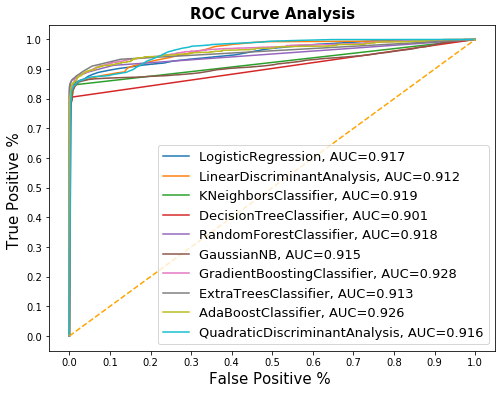

In [11]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive % ", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive % ", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Nous n'allons retenir que les meilleurs AUC et essayer de les améliorer. 
Parmis les meilleurs prenons :

    - Gradient Boosting
    - AdaBoost
  

## Gradient Boosting

Start with lr = 0.7
Start with lr = 0.5
Start with lr = 0.4
Start with lr = 0.2
Start with lr = 0.05
Start with lr = 0.01


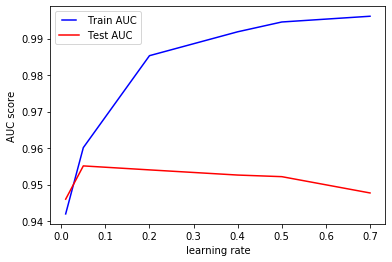

In [27]:
learning_rates = [0.7, 0.5, 0.4, 0.2, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    print('Start with lr =', eta)
    gradBoost = GradientBoostingClassifier(learning_rate=eta)
    gradBoost.fit(X_train, y_train)
    train_pred = gradBoost.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = gradBoost.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

Start with estimator = [4, 16, 32, 64, 100, 200]
Start with estimator = [4, 16, 32, 64, 100, 200]
Start with estimator = [4, 16, 32, 64, 100, 200]
Start with estimator = [4, 16, 32, 64, 100, 200]
Start with estimator = [4, 16, 32, 64, 100, 200]
Start with estimator = [4, 16, 32, 64, 100, 200]


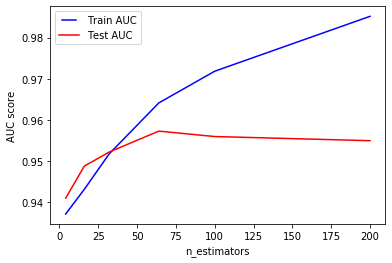

In [28]:
n_estimators = [4, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    print('Start with estimator =', n_estimators)
    model = GradientBoostingClassifier(n_estimators=estimator)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    model = GradientBoostingClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    model = GradientBoostingClassifier(min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

## AdaBoost

n_estimators and learning_rate

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 300, 400]
train_results = []
test_results = []
for estimator in n_estimators:
    model = AdaBoostClassifier(n_estimators=estimator)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [ ]:
learning_rate = [0.2,0.5,0.7,1]
train_results = []
test_results = []
for learn in learning_rate:
    model = AdaBoostClassifier(learning_rate=learn)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rate, train_results, 'b', label='Train AUC')
line2, = plt.plot(learning_rate, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

## Résultats

In [12]:
GB = GradientBoostingClassifier(learning_rate=0.05, n_estimators=64, max_depth = 4, min_samples_split=0.6)
GB.fit(X_train,y_train)
Ada = AdaBoostClassifier(learning_rate=0.2, n_estimators=64)
Ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=64, random_state=None)

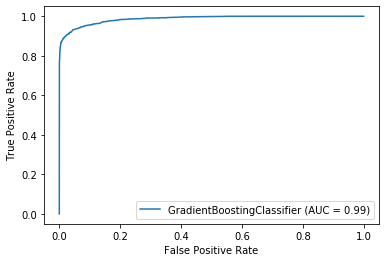

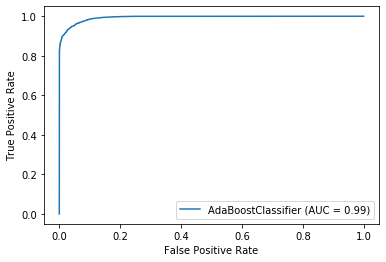

In [13]:

(metrics.plot_roc_curve(GB, X_train, y_train))
(metrics.plot_roc_curve(Ada, X_train, y_train))


Nous obtenons de très bons résultats. Cependant, des résultats aussi élevés peuvent paraître suspect. Il faudrait voir si pour de futures données, on obtiendrait toujours d'aussi bons résultats.

## Visualisation grâce à la réduction de dimension

Nous allons tester différentes techniques de réduction de dimensions. 

En voici la liste : 
         - ACP
         - Isomap
         - LLE
         - TSNE
         - UMAP
         
Nous allons précéder de la façon suivante, 
1. Fit l'algorithme sur les données X_train
2. Plot avec couleur des labels sur les 2 premières dimensions

Nous prendrons seulement 1% des valeurs pour que les algorithmes ne prennent pas trop de temps. 


In [14]:
# 1% de la base dans X_train
X_train, XX, y, yy = train_test_split(X_train, y_train, test_size = 0.99)
# XX et yy ne seront pas utilisé
print(X_train.shape)
print(y.value_counts())

(4548, 11)
1    2293
0    2255
Name: Class, dtype: int64


Création d'une fonction permettant l'affichage des données.

In [15]:
from time import time

def plot_embedding(X, title=None):
    
    plt.figure()
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.scatter(X[:, 0], X[:, 1], c=y.values,s=5)
    if title is not None:
        plt.title(title)


### ACP

Computing PCA projection
Done.


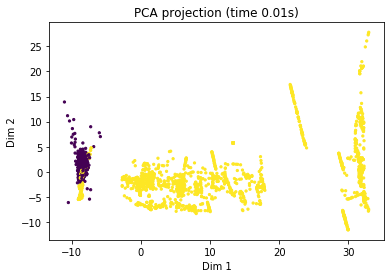

In [16]:
from sklearn.decomposition import PCA

print("Computing PCA projection")
t0 = time()
pca = PCA(n_components=2).fit_transform(X_train)
print("Done.")
plot_embedding(pca,
               "PCA projection (time %.2fs)" %
               (time() - t0))


### ISOMAP

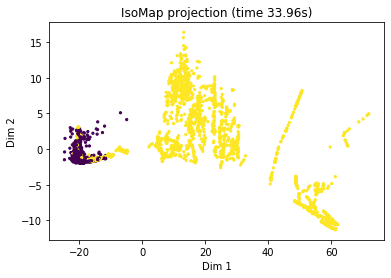

In [17]:
from sklearn.manifold import Isomap

t0 = time()

iso = Isomap(n_components=3, n_neighbors=110).fit_transform(X_train)
plot_embedding(iso,
               "IsoMap projection (time %.2fs)" %
               (time() - t0))


### LLE

Computing LLE embedding
Done. Reconstruction error: 2.69581e-17


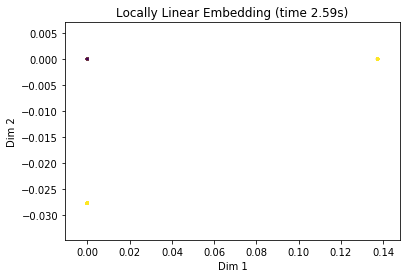

In [18]:
from sklearn.manifold import LocallyLinearEmbedding
print("Computing LLE embedding")
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=40)
t0 = time()
X_lle = lle.fit_transform(X_train)
print("Done. Reconstruction error: %g" % lle.reconstruction_error_)
plot_embedding(X_lle,
               "Locally Linear Embedding (time %.2fs)" %
               (time() - t0))

Affichons les labels 1 afin de vérifier s'il n'y en a bien que 1 point, ce qui voudrait dire que nous avons des données parfaitement séparées.

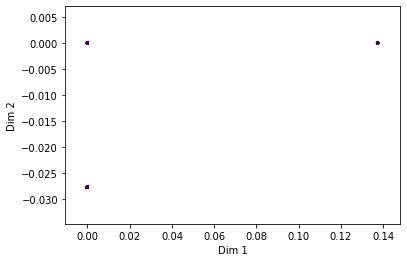

In [19]:
tmp = pd.DataFrame(X_lle)
tmp2 = pd.DataFrame(y)
pd.concat([tmp, tmp2], axis=1)
ttmp = np.c_[X_lle,y]
X = ttmp[ttmp[:,2] == 1]
plt.figure()
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.scatter(X[:, 0], X[:, 1], c=X[:,2],s=5)

Les labels 1 sont mélangés avec les deux autres points de LLE.

### TSNE

Computing t-SNE embedding


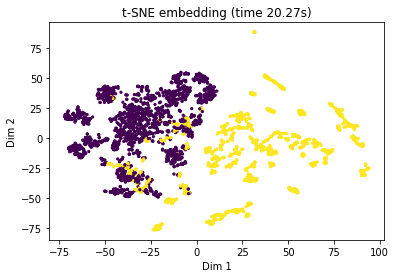

In [20]:
from sklearn.manifold import TSNE
print("Computing t-SNE embedding")
tsne = TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X_train)

plot_embedding(X_tsne,
               "t-SNE embedding (time %.2fs)" %
               (time() - t0))

### MDS

Computing MDS embedding
Done. Stress: 39207488.516382


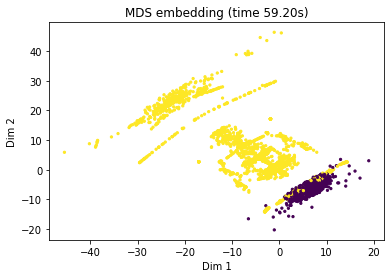

In [21]:
from sklearn.manifold import MDS

print("Computing MDS embedding")
mds = MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = mds.fit_transform(X_train)
print("Done. Stress: %f" % mds.stress_)
plot_embedding(X_mds,
               "MDS embedding (time %.2fs)" %
               (time() - t0))

### UMAP

Computing UMAP embedding
Done.


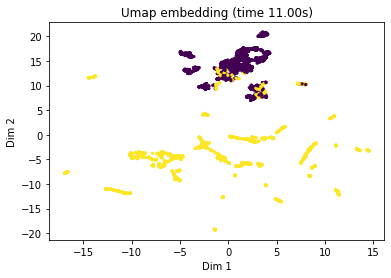

In [22]:
import umap


print("Computing UMAP embedding")
umap = umap.UMAP()
t0 = time()
umap = umap.fit_transform(X_train)
print('Done.')
plot_embedding(umap,
               "Umap embedding (time %.2fs)" %
               (time() - t0))

### Conclusion

Nous observons que tous les algorithmes, hormis LLE, donnent les mêmes analyses : les 2 classes se confondent dans un groupe, puis une classe est éparpillée autour.
LLE, lui, nous donne 3 points distincts mais les labels se mélangent. 